# FORTRAN to DBN Demo


In this demo we will be showing how a Dynamic Bayes Network can be constructed from the source code for a FORTRAN program. For the purposes of this demo the FORTRAN program was compiled and interpreted into an equivalent program in Python. This program was then parsed into a JSON representation of the statements and functions contained in the program. We have created a new layer that takes this JSON description, discovers all scopes and assignment statements in the JSON description, and builds a DBN where nodes show how information flows through the variables and assignment statements in the program during runtime.

## Program initialization


We first import the libraries we will need to read the JSON description, construct a nested scope tree, and display the DBN from the nested scope tree. We will be using pygraphviz to create a DOT file description of the DBN we will create from the JSON file. We will use graphviz to display the created graph from the DOT file. We have defined a set of `ScopeNode` objects in our scopes package that will be used to create our rooted tree of scopes when creating our DBN.

In [18]:
from pygraphviz import AGraph
from graphviz import Source
import json

import scopes as scp
import parse_dbn_json as utils

## Constructing the scope tree


We first read in the JSON data using standard python utilities. Once we have the json data we will use this data to build a nested scope tree. The scope tree is a rooted collection of nested `ScopeNode` objects. We currently have two different scopes that our program identifies, a `LoopScopeNode` meant to track loops found in the initial program and a `FuncScopeNode` meant to track functions found in the initial program. The `scope_tree` defined below will be a `ScopeNode` object that has other `ScopeNode` obejects as its children.

In [19]:
data = json.load(open("../../data/program_analysis/pa_crop_yield_v0.2/crop_yield_DBN.json"))
scope_tree = scp.scope_tree_from_json(data)

## Viewing the DBN


The final step is to construct a DBN from `scope_tree`. Below we create a digraph to show the DBN as a flow of information through the program at runtime. Scopes are nested and the breadth of each scope is shown with a colored bounding box. Function scopes are colored in green while loop scopes are shown in blue. Each scope is labeled with the scope specific name as found in the JSON specification. Variables from the program are shown as ellipses contained in their appropriate scopes. Variables are named with the name of the variable in the program and the name of the scope in which the variable was first defined. Actions, such as variable assignment or conditional evaluation, are shown as red rectangles and are labeled similarly to variables.

This graph has a linked structure that shows how variables from one scope populate for use into child scopes. This allows us to see the entire data flow profile of the initial program at runtime.

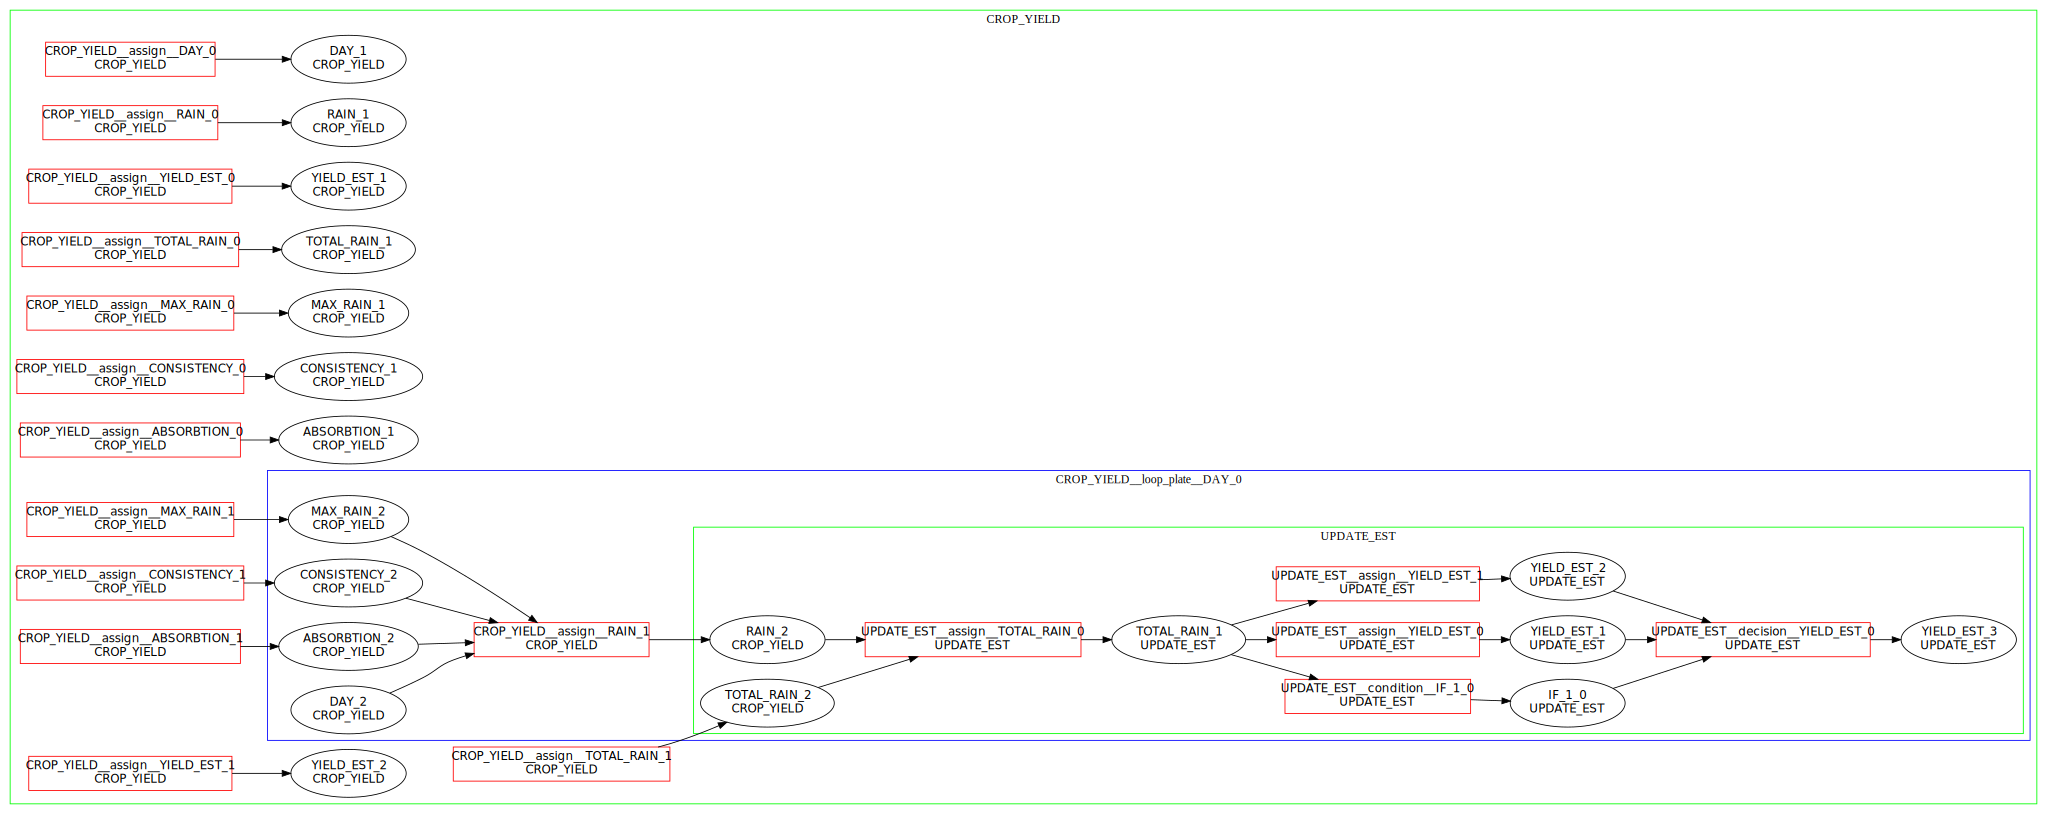

In [17]:
graph = utils.setup_directed_graph()
scope_tree.linked_graph(graph)
graph.write("linked_graph.dot")
Source.from_file("linked_graph.dot")